In [7]:
%matplotlib inline
import seaborn as sns
from birdsonganalysis.distribs import get_distribs
from birdsonganalysis import all_song_features
from birdsonganalysis import utils
from scipy.io import wavfile
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from collections import defaultdict

In [8]:
sr, samba = wavfile.read('../songs/samba.wav')
sr, simple = wavfile.read('../songs/simple.wav')
sr, bells = wavfile.read('../songs/bells.wav')
sr, flashcam = wavfile.read('../songs/flashcam.wav')
sr, lg109 = wavfile.read('../songs/LG109.wav')
sr, lg193 = wavfile.read('../songs/LG193.wav')
sr, pu7 = wavfile.read('../songs/Pu7.wav')
sr, pu40 = wavfile.read('../songs/Pu40.wav')
sr, pu72 = wavfile.read('../songs/Pu72.wav')

songs = [samba, simple, bells, flashcam, lg109, lg193, pu7, pu40]

# Get the medians and the MAD

In [9]:
f = defaultdict(lambda: np.array([], dtype=float))
for song in songs:
    feats = all_song_features(song, sr)
    # remove the silence
    for key in feats:
        if (key != 'amplitude'):
            feats[key] = feats[key][feats['amplitude'] > np.percentile(feats['amplitude'], 20)]
    for fname in feats:
        f[fname] = np.concatenate((f[fname], feats[fname]))

In [10]:
def mad(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation 
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.median(np.abs(arr - med))

In [11]:
from pprint import pprint
dmed = {}
dmad = {}
for key in f:
    cmed = np.median(f[key])
    cmad = mad(f[key])
    dmed[key] = cmed
    dmad[key] = cmad
print('med =')
pprint(dmed, indent=4)
print('mad =')
pprint(dmad, indent=4)
utils.set_med_mad(dmed, dmad)

med =
{   'am': -0.0056657042753024663,
    'amplitude': 81.37709923817728,
    'entropy': -4.2631974848992744,
    'fm': 0.83123335339288407,
    'goodness': 0.11410073023575194,
    'pitch': 3017.700439453125}
mad =
{   'am': 2.2208938951012631,
    'amplitude': 6.9446687385734052,
    'entropy': 0.8973141824407338,
    'fm': 0.356186590384728,
    'goodness': 0.028523974833639901,
    'pitch': 570.063720703125}


Let's put these values in utils.py

Let's compute all the global errors and locals errors possible between all of these songs against each other (therefore, 10×9/2=45 comparisons)

In [12]:
# Takes an hour or more, can be parallelised at some point
allG, allL = get_distribs(songs)

1/28
2/28
elapsed: 0:01:23.097134, Total: 0:38:46.719748
3/28
elapsed: 0:03:14.947729, Total: 0:45:29.268211
4/28
elapsed: 0:04:55.966185, Total: 0:46:02.351063
5/28
elapsed: 0:06:28.992715, Total: 0:45:22.949008
6/28
elapsed: 0:07:51.392070, Total: 0:43:59.795591
7/28
elapsed: 0:09:26.026285, Total: 0:44:01.455996
8/28
elapsed: 0:10:37.500266, Total: 0:42:30.001065
9/28
elapsed: 0:12:07.926226, Total: 0:42:27.741791
10/28
elapsed: 0:13:28.814569, Total: 0:41:56.311992
11/28
elapsed: 0:14:41.728051, Total: 0:41:08.838544
12/28
elapsed: 0:15:45.960549, Total: 0:40:07.899580
13/28
elapsed: 0:17:00.097355, Total: 0:39:40.227163
14/28
elapsed: 0:17:57.073795, Total: 0:38:39.851250
15/28
elapsed: 0:19:49.545171, Total: 0:39:39.090343
16/28
elapsed: 0:21:29.639364, Total: 0:40:07.326812
17/28
elapsed: 0:22:57.177523, Total: 0:40:10.060665
18/28
elapsed: 0:24:41.559768, Total: 0:40:40.216088
19/28
elapsed: 0:26:01.712613, Total: 0:40:29.330731
20/28
elapsed: 0:27:33.551023, Total: 0:40:36.812

# G² distribution
Let's plot allG

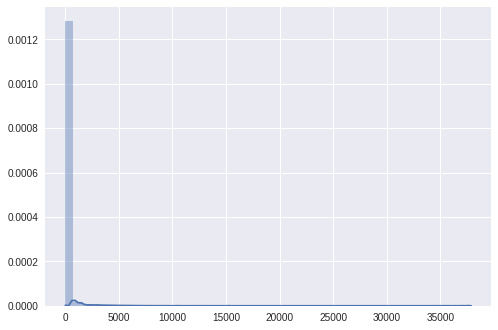

In [7]:
sns.distplot(allG)

Looks lognormal

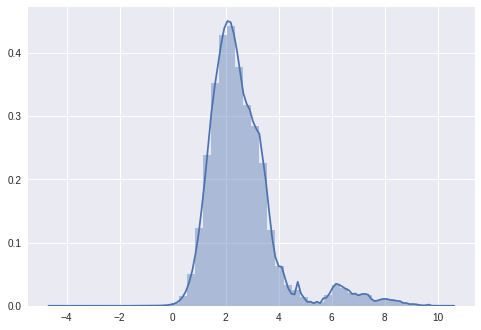

In [8]:
logallG = np.log(allG+0.01)
sns.distplot(logallG)  # Adds 0.01 to avoid -inf

In [9]:
np.mean(logallG)

2.6191330043001892

In [10]:
np.std(logallG, ddof=1)

1.3454601856090631

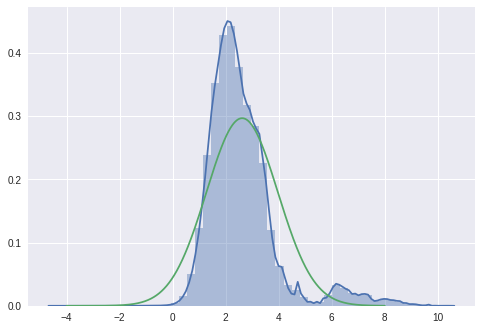

In [11]:
sns.distplot(logallG)  # Adds 0.01 to avoid -inf
plt.plot(np.linspace(-4, 8, 1000), norm.pdf(np.linspace(-4, 8, 1000), np.mean(logallG), np.std(logallG, ddof=1)))

The fit looks decent in log.

In [22]:
a = []
Gsorted = np.sort(allG)
for i in range(1, 101):
    a.append((i, np.percentile(Gsorted, i)))
print(a)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
[(1, 1.897703561406046), (2, 2.27389503165602), (3, 2.5496822688488314), (4, 2.7813141683078841), (5, 2.9848678786365497), (6, 3.1712362854072045), (7, 3.3452507675189462), (8, 3.5102508508297832), (9, 3.6686369546156428), (10, 3.8210980557758454), (11, 3.9686147606392081), (12, 4.11290114851972), (13, 4.2550745495911189), (14, 4.3958556905533861), (15, 4.5356767867557188), (16, 4.6751572300932365), (17, 4.8148866459660535), (18, 4.9556352508321648), (19, 5.0972682406878258), (20, 5.2396071810897364), (21, 5.3835621956343598), (22, 5.5277932724918566), (23, 5.6729486157194158), (24, 5.8190137739934205), (25, 5.9669586485010768), (26, 6.116397704612142), (27, 6.2667684864464288), (28, 6.4176351675545

# L² distribution
Let's plot allL

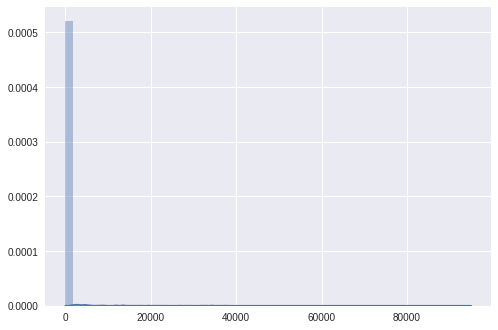

In [12]:
sns.distplot(allL)

Looks lognormal

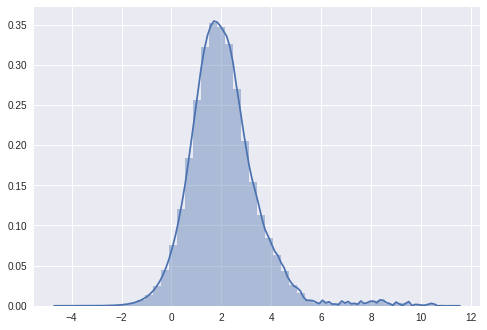

In [13]:
logallL = np.log(allL+0.01)
sns.distplot(logallL)  # Adds 0.01 to avoid -inf

In [14]:
np.mean(logallL)

2.0893176665431645

In [15]:
np.std(logallL, ddof=1)

1.3921924227352549

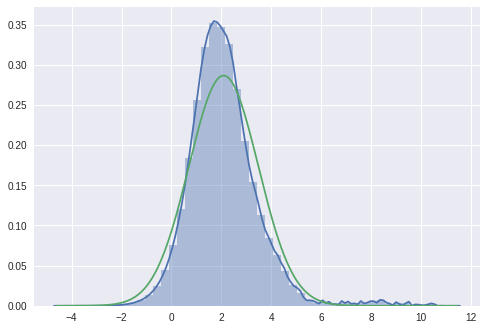

In [16]:
sns.distplot(logallL)  # Adds 0.001 to avoid -inf
imin, imax = np.min(logallL), np.max(logallL)
plt.plot(np.linspace(imin, imax, 1000), norm.pdf(np.linspace(imin, imax, 1000), np.mean(logallL), np.std(logallL, ddof=1)))

The fit looks decent in log.
We will use this value in similarity.py

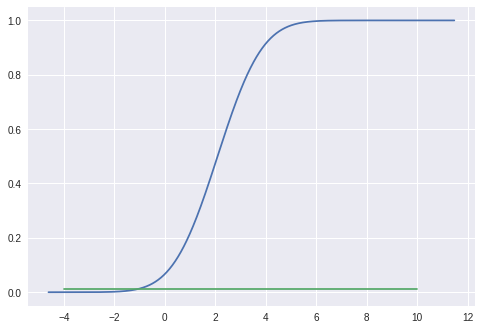

In [17]:
plt.plot(np.linspace(imin, imax, 1000), norm.cdf(np.linspace(imin, imax, 1000), np.mean(logallL), np.std(logallL, ddof=1)))
plt.plot([-4, 10], [0.01, 0.01])

In [23]:
b = []
Lsorted = np.sort(allL)
for i in range(1, 101):
    b.append((i, np.percentile(Lsorted, i)))
print(b)

[(1, 0.49440015654043235), (2, 0.70467896383803819), (3, 0.87476000112848906), (4, 1.0249163171581859), (5, 1.1631713065631886), (6, 1.2935106148382491), (7, 1.4178644336857507), (8, 1.5380764341157318), (9, 1.6548283858972512), (10, 1.7691412610366242), (11, 1.8812207308801632), (12, 1.9915833567944166), (13, 2.1005939548283736), (14, 2.2087182769431379), (15, 2.3163671208077945), (16, 2.4237411484788614), (17, 2.5310650457565353), (18, 2.6384100554352621), (19, 2.7461427186870591), (20, 2.8541456020590008), (21, 2.962787296252996), (22, 3.0715979863991234), (23, 3.1812213860440819), (24, 3.291886525931683), (25, 3.4036106997425479), (26, 3.5165670482127824), (27, 3.6310231894284315), (28, 3.7474223161557378), (29, 3.8657175584168106), (30, 3.9856649169411211), (31, 4.1080408419779744), (32, 4.2326478787156354), (33, 4.3599955989567718), (34, 4.4898457360614819), (35, 4.6225673829577403), (36, 4.7578625321613615), (37, 4.8967160268472458), (38, 5.0387321472037332), (39, 5.184083944995